#Computer vision

It is used to detect and classify objects (eg : Road signs , traffic lights) , create a 3D maps or motion estimation and play a key role in making autonomous vehicles a reality

#ComputerVision Libraries ->

* torchvision : Base Domain libraray for Pytorch computer vision

* torchvision.datasets : Get Datasets and Data Loading functions for computer vision

* torchvision.models : Get pretrained computer vison models that you can leverage for your own problems

* torchvison.transforms : Functions for manipulating your vision data (images) to be suitable for use with an ML model


In [112]:
#Import Pytorch
import torch
import torch.nn as nn

#import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

#import matplotlib
import matplotlib.pyplot as plt

#Checking versions
print(torch.__version__)
print(torchvision.__version__)

2.1.0+cu121
0.16.0+cu121


# 1. Getting a dataset

The dataset we'll be using is FashionMNIST from torchvision.datasets

In [113]:
from torchvision import datasets
from torchvision.transforms import ToTensor

train_data = datasets.FashionMNIST(
    root = "data", #Where to download data to ?
    train = True, #Do we want the training dataset ?
    download = True, #Do we want to download
    transform = ToTensor(), #How do we want to transform the data
    target_transform = None #How do we want to transform the targets ?
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor(),
    target_transform = None,
)

In [114]:
len(train_data) , len(test_data)

(60000, 10000)

In [115]:
image , label = train_data[0]

In [116]:
image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [117]:
label

9

In [118]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [119]:
#Corresponding index of Particular cloth
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [120]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [121]:
#Checking the shape of the image
print(f'Image shape is {image.shape} -> [color_channels , height , width]')
print(f'Image label : {class_names[label]}')

Image shape is torch.Size([1, 28, 28]) -> [color_channels , height , width]
Image label : Ankle boot


#Visulaizing our Data

Text(0.5, 1.0, '9')

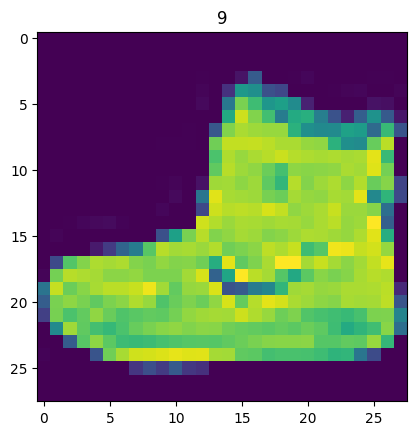

In [122]:
import matplotlib.pyplot as plt
image , label = train_data[0]
plt.imshow(image.squeeze())
plt.title(label)

(-0.5, 27.5, 27.5, -0.5)

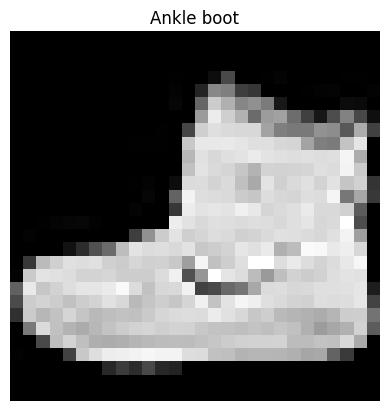

In [123]:
plt.imshow(image.squeeze(),cmap = "gray")
plt.title(class_names[label])
plt.axis(False)

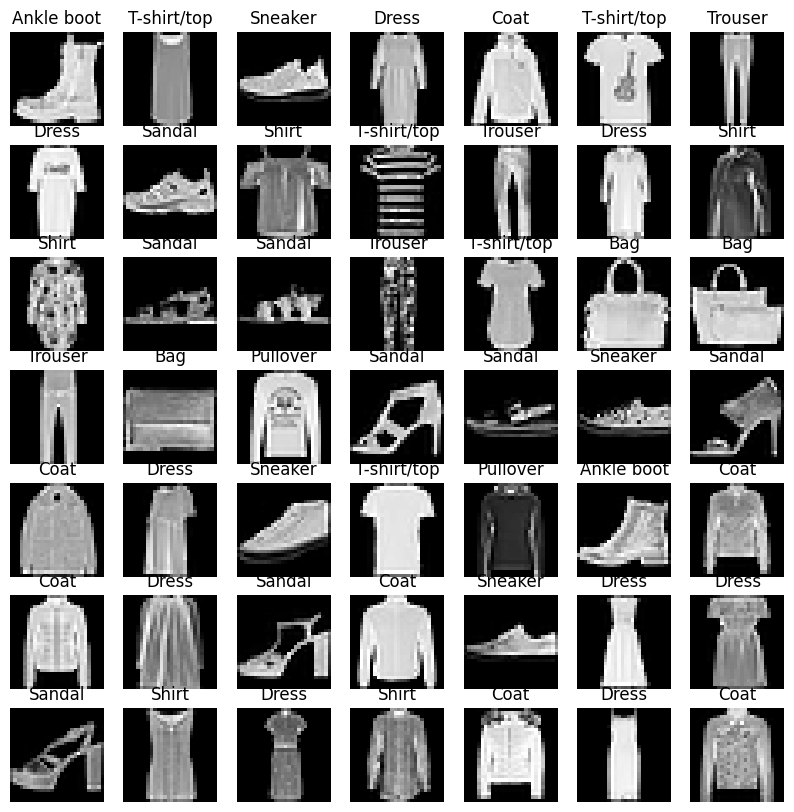

In [124]:
fig = plt.figure(figsize=(10,10))
rows = 7
columns = 7
for i in range(1,rows*columns+1):
  random_idx = torch.randint(1,len(train_data),(1,)).item()
  img , lab = train_data[random_idx]
  fig.add_subplot(rows,columns,i)
  plt.imshow(img.squeeze(),cmap="gray")
  plt.title(class_names[lab])
  plt.axis(False)

#Prepare DataLoader
Right now, our data is in the form of PyTorch Datasets.


DataLoader turns our dataset into a Python iterable.
More specifically, we want to turn our data into batches (or mini-batches).


Why would we do this?


1. It is more computationally efficient, as in, your computing hardware may not be able to look (store in memory) at 60000 images in one hit.
So we break it down to 32 images at a time (batch size of 32).


2. It gives our neural network more chances to update its gradients per epoch.

In [125]:
from torch.utils.data import DataLoader

#setup the Batchsize
BATCH_SIZE = 32
train_dataloader = DataLoader(train_data,batch_size = BATCH_SIZE , shuffle = True)
test_dataloader = DataLoader(test_data,batch_size = BATCH_SIZE , shuffle = True)

In [126]:
print(f"Size of Train_DataLoader : {len(train_dataloader)} of Batch size = {BATCH_SIZE}")
print(f"Size of Test_DataLoader : {len(test_dataloader)} of Batch size = {BATCH_SIZE}")

Size of Train_DataLoader : 1875 of Batch size = 32
Size of Test_DataLoader : 313 of Batch size = 32


In [127]:
#Check out what's inside the DataLoader
train_features_batch , train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape , train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size is torch.Size([1, 28, 28])
Label is 9 and size is torch.Size([])


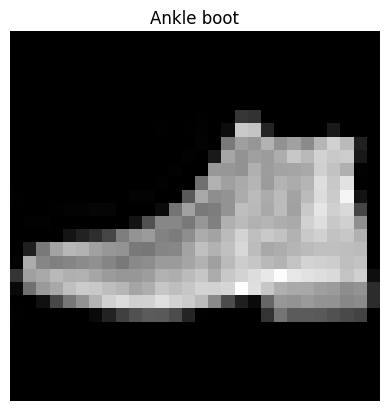

In [128]:
#Set up randomseed
#torch.manual_seed(42)
random_idx = torch.randint(1,len(train_features_batch),size = [1]).item()
img , labels = train_features_batch[random_idx] , train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap = "gray")
plt.title(class_names[labels])
plt.axis(False)
print(f"Image size is {img.shape}")
print(f"Label is {labels} and size is {labels.shape}")

#Building a BaseLine Model

In [129]:
#Create a flatten layer
flatten_model = nn.Flatten()

#Get a single sample
x = train_features_batch[0]

#Flatten the sample
output = flatten_model(x)

print(f"Shape before flattening : {x.shape} -> [color_channels,height,width]")
print(f"Shape after flattening : {output.shape} -> [color_channels,height*width]")

Shape before flattening : torch.Size([1, 28, 28]) -> [color_channels,height,width]
Shape after flattening : torch.Size([1, 784]) -> [color_channels,height*width]


In [130]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,input_shape : int , hidden_units : int , output_shape):
    super().__init__()

    self.layer = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape , out_features = hidden_units),
        nn.Linear(in_features = hidden_units , out_features = output_shape)
    )

  def forward(self,x):
    return self.layer(x)

In [131]:
torch.manual_seed(42)
model_0 = FashionMNISTModelV0(
    input_shape = 784, #This is 28*28
    hidden_units = 10, #This is how many units in the hidden layer
    output_shape = len(class_names) #one for every class
)
model_0

FashionMNISTModelV0(
  (layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [132]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

#Setup loss, optimizer and evaluation metrics


• Loss function - since we're working with multi-class data, our loss function will be nn. CrossEntropyLoss ()


• Optimizer - our optimizer torch.optim. SGD () (stochastic gradient descent)


. Evaluation metric - since we're working on a classification problem, let's use accruacy as our evaluation metric

In [133]:
#Loss function
loss_fn = nn.CrossEntropyLoss()

#Optimizer function
optimizer = torch.optim.Adam(model_0.parameters() , lr = 0.01)

#Accuracy function
def accuracy(train_preds,y_train):
  acc = torch.eq(train_preds,y_train).sum().item()
  return acc/len(train_preds)


In [134]:
from timeit import default_timer as timer
def print_train_time(start : float , end : float) :
  total_time = end - start
  print(f"Total time {total_time}")
  return total_time

In [135]:
start_time = timer()
#code
end_time = timer()
print_train_time(start_time,end_time)

Total time 5.35870003659511e-05


5.35870003659511e-05

#Creating a training and testing loops for batched data

In [136]:
#Import tqdm for progress bar
from tqdm.auto import tqdm

#Set the seed and timer
torch.manual_seed(42)
start_time = timer()

#Set the number of epochs
epochs = 3

for epoch in tqdm (range(epochs)):
  print(f"Epoch : {epoch}\n------")

  #Traing
  train_loss = 0

  #Add a loop to loop through the training batches
  for batch , (X,y) in enumerate(train_dataloader):
    model_0.train()

    #1.Forward pass
    y_pred = model_0(X)

    #2.Calculate the loss
    loss = loss_fn(y_pred,y)
    train_loss+=loss


    #3.Optimizer zero grad
    optimizer.zero_grad()

    #4.Loss backpropagation
    loss.backward()

    #5.Optimizer.step
    optimizer.step()


    #Printing

    if(batch % 400 == 0):
      print(f"Looked at batch : {batch} , len(x) : {len(X)} , {batch*len(X)}/{len(train_dataloader.dataset)} samples.")

  train_loss = train_loss/len(train_dataloader)


  #Testing
  test_loss,test_acc = 0,0
  model_0.eval()
  with torch.inference_mode():
    for x_test,y_test in test_dataloader:

      #1.Forward pass
      test_pred = model_0(x_test)

      #2.Calculate the loss
      test_loss+=loss_fn(test_pred,y_test)

      #3.Calculate the accuracy
      test_acc+=accuracy(y_test,test_pred.argmax(dim=1))

    #4.Calculate the test loss average per batch
    test_loss/=len(test_dataloader)

    #5.Calculate the test acc average per batch
    test_acc/=len(test_dataloader)

    print(f"\nTrain loss : {train_loss:.4f} | Test loss : {test_loss:.4f} , Test acc : {test_acc*100 :.4f}")

    #Calculate training time
    end_time = timer()
    print_train_time(start_time,end_time)



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0
------
Looked at batch : 0 , len(x) : 32 , 0/60000 samples.
Looked at batch : 400 , len(x) : 32 , 12800/60000 samples.
Looked at batch : 800 , len(x) : 32 , 25600/60000 samples.
Looked at batch : 1200 , len(x) : 32 , 38400/60000 samples.
Looked at batch : 1600 , len(x) : 32 , 51200/60000 samples.

Train loss : 0.5645 | Test loss : 0.5094 , Test acc : 82.2484
Total time 12.059448818999954
Epoch : 1
------
Looked at batch : 0 , len(x) : 32 , 0/60000 samples.
Looked at batch : 400 , len(x) : 32 , 12800/60000 samples.
Looked at batch : 800 , len(x) : 32 , 25600/60000 samples.
Looked at batch : 1200 , len(x) : 32 , 38400/60000 samples.
Looked at batch : 1600 , len(x) : 32 , 51200/60000 samples.

Train loss : 0.4979 | Test loss : 0.5246 , Test acc : 81.7192
Total time 23.320256442000755
Epoch : 2
------
Looked at batch : 0 , len(x) : 32 , 0/60000 samples.
Looked at batch : 400 , len(x) : 32 , 12800/60000 samples.
Looked at batch : 800 , len(x) : 32 , 25600/60000 samples.
Looked at 

#Make predictions and get Model 0 results

In [137]:

def evaluate_model(model : torch.nn.Module,
                   data_loader : torch.utils.data.DataLoader,
                   loss_fn : torch.nn.Module,
                   accuracy_fn):
  from tqdm.auto import tqdm
  epochs = 3
  loss,acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      y_pred = model(X)
      loss+=loss_fn(y_pred,y)
      acc+=accuracy_fn(y,y_pred.argmax(dim=1))
    loss/= len(data_loader)
    acc/=len(data_loader)

  return {"model_name" : model.__class__.__name__,
          "model_loss" : loss.item(),
          "model_acc" : acc*100}
results = evaluate_model(model_0,test_dataloader,loss_fn,accuracy)

  0%|          | 0/313 [00:00<?, ?it/s]

In [138]:
results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.5095160603523254,
 'model_acc': 82.99720447284345}

#Building a Better Model with Non-linearity



In [139]:
from torch import nn
class FashionMNISTModelV1(nn.Module):
  def __init__(self,input_shape,
               hidden_units,
               output_shape):
    super().__init__()


    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape,
                  out_features = hidden_units,),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units ,
                  out_features = output_shape),
        nn.ReLU()
    )

  def forward(self,x : torch.Tensor):
    return self.layer_stack(x)


In [140]:
#Create an instance of model_1
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape = 784,
                              hidden_units = 10,
                              output_shape = len(class_names))

In [141]:
next(model_1.parameters())

Parameter containing:
tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
        [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
        [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
        ...,
        [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
        [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
        [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]],
       requires_grad=True)

In [142]:
#Setup loss,optimizer,accuracy

loss_fn = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model_1.parameters(),lr = 0.01)

def accuracy(train_preds,y_train):
  acc = torch.eq(train_preds,y_train).sum().item()
  return acc/len(train_preds)

In [143]:
#Import tqdm for progress bar
from tqdm.auto import tqdm

#Set the seed and timer
torch.manual_seed(42)
start_time = timer()

#Set the number of epochs
epochs = 3

for epoch in tqdm (range(epochs)):
  print(f"Epoch : {epoch}\n------")

  #Traing
  train_loss = 0
  train_accuracy = 0

  #Add a loop to loop through the training batches
  for batch , (X,y) in enumerate(train_dataloader):
    model_0.train()

    #1.Forward pass
    y_pred = model_1(X)

    #2.Calculate the loss
    loss = loss_fn(y_pred,y)
    train_loss+=loss
    train_accuracy+=accuracy(y,y_pred.argmax(dim = 1))


    #3.Optimizer zero grad
    optimizer.zero_grad()

    #4.Loss backpropagation
    loss.backward()

    #5.Optimizer.step
    optimizer.step()


  #Printing
  train_loss = train_loss/len(train_dataloader)
  train_accuracy = train_accuracy/len(train_dataloader)


  #Testing
  test_loss,test_acc = 0,0
  model_0.eval()
  with torch.inference_mode():
    for x_test,y_test in test_dataloader:

      #1.Forward pass
      test_pred = model_1(x_test)

      #2.Calculate the loss
      test_loss+=loss_fn(test_pred,y_test)

      #3.Calculate the accuracy
      test_acc+=accuracy(y_test,test_pred.argmax(dim=1))

    #4.Calculate the test loss average per batch
    test_loss/=len(test_dataloader)

    #5.Calculate the test acc average per batch
    test_acc/=len(test_dataloader)

    #Calculate training time
    end_time = timer()
    print_train_time(start_time,end_time)

  print(f"\nTrain loss : {train_loss:.4f} | Train acc : {train_accuracy*100:.4f} | Test loss : {test_loss:.4f} | Test acc : {test_acc*100 :.4f}")


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0
------
Total time 12.103580958999373

Train loss : 0.7787 | Train acc : 72.1933 | Test loss : 0.7269 | Test acc : 74.8003
Epoch : 1
------
Total time 23.658999909999693

Train loss : 0.6865 | Train acc : 75.1800 | Test loss : 0.7338 | Test acc : 74.0615
Epoch : 2
------
Total time 35.33006095699966

Train loss : 0.6690 | Train acc : 75.6667 | Test loss : 0.7032 | Test acc : 74.7105


In [144]:
#Get model_1 results dictionary
model_1_results = evaluate_model(model = model_1,
                   data_loader = test_dataloader,
                   loss_fn = loss_fn,
                   accuracy_fn = accuracy)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.7028547525405884,
 'model_acc': 74.73043130990416}

In [145]:
#Get model_0 results dictionary
model_0_results = evaluate_model(model = model_0,
                   data_loader = test_dataloader,
                   loss_fn = loss_fn,
                   accuracy_fn = accuracy)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.5098119378089905,
 'model_acc': 82.98722044728434}

#Model 2 : Convolution Neural Network

CNN's are also know as ConvNets

CNN's are known for their capabilities to find patterns in visual data

In [151]:

#Create a convolution neural network
class FashionMNISTModelV2(nn.Module):
  def __init__(self,input_shape : int , output_shape : int , hidden_units : int):
    super().__init__()

    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape , out_channels = hidden_units,
                  kernel_size = 3 , stride = 1 , padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units , out_channels = hidden_units,
                  kernel_size = 3 , stride = 1 , padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units , out_channels = hidden_units,
                  kernel_size = 3 , stride = 1 , padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units , out_channels = hidden_units,
                  kernel_size = 3 , stride = 1 , padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)
    )
    self.classifier = nn.Sequential(
      nn.Flatten(),
      nn.Linear(in_features = hidden_units*0,
                out_features = output_shape)
    )

  def forward(self,x):
    x = self.conv_block_1(x)
    print(x.shape)
    x = self.conv_block_2(x)
    print(x.shape)
    x = self.classifier(x)
    return x

In [154]:
image.shape[0]

1

In [155]:
len(class_names)

10

In [156]:
model_2 = FashionMNISTModelV2(
    input_shape = 1,
    output_shape = len(class_names),
    hidden_units = 10
)

/usr/local/lib/python3.10/dist-packages/torch/nn/init.py:412: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")
